In [1]:
import jax
import jax.numpy as jnp
from jax import random

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("./"))))

from jaxmeta.model_init import init_siren_params

from training import Agent
from loss import model, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn
import config

%load_ext autoreload
%autoreload 2

name = "1"

config.PATH = "experiments_2"
config.NAME = "{}/{}".format(config.PATH, name)
config.log_file = sys.stdout

config.layers = [2] + [32]*4 + [2]
config.c0 = 1.0
config.w0 = jnp.array([[1.0, 1.0]]).T

key, *subkeys = random.split(config.key, 3)
params = init_siren_params(subkeys[0], config.layers, config.c0, config.w0)

config.n_data = {
	"i": 160, "b": 160, "cx": 160, "ct": 160,
}
config.batch_size = {
	"dirichlet": (config.n_data["i"] + 2*config.n_data["b"]),
	"collocation": (config.n_data["cx"]*config.n_data["ct"]),
}
config.weights = {
	"c1": 1.0,
	"c2": 3.0,
	"d1": 10.0,
	"d2": 10.0,
	"l1": 1e-8,
	"l2": 1e-8,
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"])
batch_fn, evaluate_batch_fn = generate_batch_fn(subkeys[1], config.batch_size, *datasets, config.weights)

config.iterations = 100000
config.print_every = 500
config.lr = 1e-3

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/13, 10:36:23, Iteration: 500, Train Loss: 5.0974e+00, c1: 8.3738e-02, c2: 2.9128e-02, d1: 4.9102e-01, d2: 1.6013e-03, l1_reg: 3.0264e+02, l2_reg: 4.2575e+01
2020/09/13, 10:36:28, Iteration: 1000, Train Loss: 5.1105e+00, c1: 1.0503e-01, c2: 1.7523e-02, d1: 4.9442e-01, d2: 8.6920e-04, l1_reg: 3.0123e+02, l2_reg: 4.2103e+01
2020/09/13, 10:36:33, Iteration: 1500, Train Loss: 5.0901e+00, c1: 8.6108e-02, c2: 8.3820e-03, d1: 4.9721e-01, d2: 6.7030e-04, l1_reg: 2.9989e+02, l2_reg: 4.1771e+01
2020/09/13, 10:36:38, Iteration: 2000, Train Loss: 5.0411e+00, c1: 1.9529e-02, c2: 1.2766e-02, d1: 4.9621e-01, d2: 2.1212e-03, l1_reg: 2.9938e+02, l2_reg: 4.1681e+01
2020/09/13, 10:36:42, Iteration: 2500, Train Loss: 5.0262e+00, c1: 1.6549e-02, c2: 1.9742e-03, d1: 4.9807e-01, d2: 2.3009e-03, l1_reg: 2.9903e+02, l2_reg: 4.1661e+01
2020/09/13, 10:36:47, Iteration: 3000, Train Loss: 5.0340e+00, c1: 3.2965e-02, c2: 4.6614e-03, d1: 4.9768e-01, d2: 1.0268e-03, l1_reg: 2.9905e+02, l2_reg: 4.1770e+01
2020/

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/13, 10:37:58, Iteration: 10500, Train Loss: 1.3774e+00, c1: 1.8204e-01, c2: 1.9419e-01, d1: 5.2321e-02, d2: 8.9623e-03, l1_reg: 3.6021e+02, l2_reg: 7.2188e+01
2020/09/13, 10:38:03, Iteration: 11000, Train Loss: 1.2840e+00, c1: 1.2152e-01, c2: 1.7557e-01, d1: 5.0319e-02, d2: 1.3257e-02, l1_reg: 3.6337e+02, l2_reg: 7.3738e+01
2020/09/13, 10:38:07, Iteration: 11500, Train Loss: 1.1092e+00, c1: 8.5394e-02, c2: 1.5893e-01, d1: 4.7683e-02, d2: 7.0168e-03, l1_reg: 3.6618e+02, l2_reg: 7.5128e+01
2020/09/13, 10:38:12, Iteration: 12000, Train Loss: 1.1603e+00, c1: 1.2862e-01, c2: 1.5011e-01, d1: 4.4728e-02, d2: 1.3410e-02, l1_reg: 3.6902e+02, l2_reg: 7.6556e+01
2020/09/13, 10:38:17, Iteration: 12500, Train Loss: 9.6597e-01, c1: 5.5205e-02, c2: 1.3790e-01, d1: 4.2148e-02, d2: 7.5590e-03, l1_reg: 3.7187e+02, l2_reg: 7.8021e+01
2020/09/13, 10:38:21, Iteration: 13000, Train Loss: 9.0928e-01, c1: 6.3109e-02, c2: 1.2837e-01, d1: 3.9370e-02, d2: 6.7352e-03, l1_reg: 3.7486e+02, l2_reg: 7.9564e+0

2020/09/13, 10:41:55, Iteration: 35500, Train Loss: 5.5732e-01, c1: 6.0889e-02, c2: 5.9455e-02, d1: 1.9633e-02, d2: 1.2173e-02, l1_reg: 4.1832e+02, l2_reg: 1.0438e+02
2020/09/13, 10:41:59, Iteration: 36000, Train Loss: 5.0945e-01, c1: 7.8444e-02, c2: 6.0733e-02, d1: 1.9244e-02, d2: 5.6360e-03, l1_reg: 4.1879e+02, l2_reg: 1.0470e+02
2020/09/13, 10:42:04, Iteration: 36500, Train Loss: 5.3275e-01, c1: 5.4718e-02, c2: 6.5388e-02, d1: 1.9915e-02, d2: 8.2707e-03, l1_reg: 4.1925e+02, l2_reg: 1.0501e+02
2020/09/13, 10:42:09, Iteration: 37000, Train Loss: 5.2722e-01, c1: 6.0797e-02, c2: 5.7331e-02, d1: 1.9468e-02, d2: 9.9744e-03, l1_reg: 4.1970e+02, l2_reg: 1.0533e+02
2020/09/13, 10:42:13, Iteration: 37500, Train Loss: 5.5752e-01, c1: 7.6308e-02, c2: 5.9250e-02, d1: 1.9196e-02, d2: 1.1150e-02, l1_reg: 4.2016e+02, l2_reg: 1.0564e+02
2020/09/13, 10:42:18, Iteration: 38000, Train Loss: 5.6928e-01, c1: 6.0998e-02, c2: 6.2449e-02, d1: 2.0249e-02, d2: 1.1844e-02, l1_reg: 4.2056e+02, l2_reg: 1.0592e+0

2020/09/13, 10:45:50, Iteration: 60500, Train Loss: 4.1896e-01, c1: 5.3617e-02, c2: 4.7907e-02, d1: 1.6920e-02, d2: 5.2425e-03, l1_reg: 4.3701e+02, l2_reg: 1.1786e+02
2020/09/13, 10:45:55, Iteration: 61000, Train Loss: 4.6342e-01, c1: 6.9964e-02, c2: 4.8872e-02, d1: 1.6791e-02, d2: 7.8922e-03, l1_reg: 4.3726e+02, l2_reg: 1.1808e+02
2020/09/13, 10:46:00, Iteration: 61500, Train Loss: 4.8008e-01, c1: 5.8616e-02, c2: 4.7599e-02, d1: 1.6700e-02, d2: 1.1166e-02, l1_reg: 4.3750e+02, l2_reg: 1.1831e+02
2020/09/13, 10:46:05, Iteration: 62000, Train Loss: 4.5308e-01, c1: 3.6956e-02, c2: 5.0323e-02, d1: 1.6075e-02, d2: 1.0441e-02, l1_reg: 4.3780e+02, l2_reg: 1.1856e+02
2020/09/13, 10:46:09, Iteration: 62500, Train Loss: 4.8833e-01, c1: 4.9297e-02, c2: 4.8151e-02, d1: 1.6494e-02, d2: 1.2963e-02, l1_reg: 4.3811e+02, l2_reg: 1.1878e+02
2020/09/13, 10:46:14, Iteration: 63000, Train Loss: 4.1412e-01, c1: 6.0427e-02, c2: 4.8547e-02, d1: 1.5939e-02, d2: 4.8657e-03, l1_reg: 4.3841e+02, l2_reg: 1.1903e+0

2020/09/13, 10:49:47, Iteration: 85500, Train Loss: 3.6990e-01, c1: 4.5551e-02, c2: 4.5205e-02, d1: 1.5385e-02, d2: 3.4874e-03, l1_reg: 4.4990e+02, l2_reg: 1.2920e+02
2020/09/13, 10:49:51, Iteration: 86000, Train Loss: 3.6020e-01, c1: 3.6172e-02, c2: 4.5396e-02, d1: 1.3913e-02, d2: 4.8707e-03, l1_reg: 4.5019e+02, l2_reg: 1.2943e+02
2020/09/13, 10:49:56, Iteration: 86500, Train Loss: 3.8485e-01, c1: 4.8459e-02, c2: 4.2187e-02, d1: 1.3936e-02, d2: 7.0470e-03, l1_reg: 4.5044e+02, l2_reg: 1.2966e+02
2020/09/13, 10:50:01, Iteration: 87000, Train Loss: 3.8470e-01, c1: 5.1100e-02, c2: 4.4350e-02, d1: 1.3828e-02, d2: 6.2264e-03, l1_reg: 4.5068e+02, l2_reg: 1.2986e+02
2020/09/13, 10:50:05, Iteration: 87500, Train Loss: 3.9252e-01, c1: 5.1178e-02, c2: 4.7202e-02, d1: 1.4574e-02, d2: 5.3985e-03, l1_reg: 4.5100e+02, l2_reg: 1.3011e+02
2020/09/13, 10:50:10, Iteration: 88000, Train Loss: 4.1758e-01, c1: 4.5205e-02, c2: 4.6885e-02, d1: 1.3721e-02, d2: 9.4506e-03, l1_reg: 4.5123e+02, l2_reg: 1.3031e+0

In [4]:
n_batchs = 100
scale = 1e-4
options = {
	"maxiter": 100000,
	"line_search_maxiter": 1000,
}
params_ = agent.train_bfgs(n_batchs, batch_fn, options, config.loss_names, config.log_file, scale = scale)

Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 370,
 njev: 370,
 nit: 326
2020/09/13, 11:12:19, Batch: 0, BFGS Loss: 2.3907e-01, c1: 1.2939e-02, c2: 3.3986e-02, d1: 1.2228e-02, d2: 1.8805e-04, l1_reg: 4.5858e+02, l2_reg: 1.3735e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 367,
 njev: 367,
 nit: 289
2020/09/13, 11:12:32, Batch: 1, BFGS Loss: 2.2856e-01, c1: 1.1241e-02, c2: 3.3126e-02, d1: 1.1619e-02, d2: 1.7436e-04, l1_reg: 4.6048e+02, l2_reg: 1.3900e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 249,
 njev: 249,
 nit: 179
2020/09/13, 11:12:43, Batch: 2, BFGS Loss: 2.

Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 191,
 njev: 191,
 nit: 81
2020/09/13, 11:16:15, Batch: 23, BFGS Loss: 2.0256e-01, c1: 8.5041e-03, c2: 3.0111e-02, d1: 1.0313e-02, d2: 5.7970e-05, l1_reg: 4.6747e+02, l2_reg: 1.4485e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 212,
 njev: 212,
 nit: 100
2020/09/13, 11:16:25, Batch: 24, BFGS Loss: 2.0211e-01, c1: 8.5313e-03, c2: 3.0043e-02, d1: 1.0282e-02, d2: 6.2971e-05, l1_reg: 4.6767e+02, l2_reg: 1.4503e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 198,
 njev: 198,
 nit: 96
2020/09/13, 11:16:36, Batch: 25, BFGS Loss: 2

Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 18,
 njev: 18,
 nit: 1
2020/09/13, 11:19:51, Batch: 46, BFGS Loss: 3.2028e-01, c1: 1.9619e-02, c2: 3.0221e-02, d1: 1.0610e-02, d2: 1.0389e-02, l1_reg: 4.6924e+02, l2_reg: 1.4640e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 114,
 njev: 114,
 nit: 36
2020/09/13, 11:20:00, Batch: 47, BFGS Loss: 1.9746e-01, c1: 8.2209e-03, c2: 2.9394e-02, d1: 1.0048e-02, d2: 5.7038e-05, l1_reg: 4.6924e+02, l2_reg: 1.4641e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 98,
 njev: 98,
 nit: 21
2020/09/13, 11:20:09, Batch: 48, BFGS Loss: 1.9744e

Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 110,
 njev: 110,
 nit: 33
2020/09/13, 11:23:21, Batch: 69, BFGS Loss: 1.9733e-01, c1: 8.1516e-03, c2: 2.9392e-02, d1: 1.0046e-02, d2: 5.4088e-05, l1_reg: 4.6925e+02, l2_reg: 1.4641e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 18,
 njev: 18,
 nit: 1
2020/09/13, 11:23:30, Batch: 70, BFGS Loss: 2.9326e-01, c1: 8.9109e-03, c2: 3.0212e-02, d1: 1.0085e-02, d2: 9.2855e-03, l1_reg: 4.6926e+02, l2_reg: 1.4642e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 20,
 njev: 20,
 nit: 2
2020/09/13, 11:23:39, Batch: 71, BFGS Loss: 5.4106e+

Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 140,
 njev: 140,
 nit: 28
2020/09/13, 11:27:37, Batch: 92, BFGS Loss: 1.7004e-01, c1: 7.2340e-03, c2: 2.5676e-02, d1: 8.4965e-03, d2: 8.0288e-05, l1_reg: 4.8781e+02, l2_reg: 1.6103e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 139,
 njev: 139,
 nit: 33
2020/09/13, 11:27:45, Batch: 93, BFGS Loss: 1.6983e-01, c1: 7.0679e-03, c2: 2.5665e-02, d1: 8.4984e-03, d2: 7.7367e-05, l1_reg: 4.8781e+02, l2_reg: 1.6103e+02
Success: False,
 Status: 3,
 Message: status meaning: 0=converged, 1=max BFGS iters reached, 3=zoom failed, 4=saddle point reached, 5=max line search iters reached, -1=undefined,
 nfev: 93,
 njev: 93,
 nit: 12
2020/09/13, 11:27:55, Batch: 94, BFGS Loss: 1.76

In [5]:
agent.compile(config.optimizer, config.lr, params_init = params_)

config.iterations = 100000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/13, 12:46:00, Iteration: 101000, Train Loss: 2.8850e-01, c1: 4.7401e-02, c2: 4.0221e-02, d1: 8.4406e-03, d2: 3.6021e-03, l1_reg: 4.9093e+02, l2_reg: 1.6418e+02
2020/09/13, 12:46:10, Iteration: 102000, Train Loss: 3.2784e-01, c1: 5.3434e-02, c2: 4.2903e-02, d1: 8.7017e-03, d2: 5.8676e-03, l1_reg: 4.9160e+02, l2_reg: 1.6492e+02
2020/09/13, 12:46:19, Iteration: 103000, Train Loss: 2.5657e-01, c1: 5.6619e-02, c2: 3.5396e-02, d1: 8.6155e-03, d2: 7.6000e-04, l1_reg: 4.9203e+02, l2_reg: 1.6545e+02
2020/09/13, 12:46:29, Iteration: 104000, Train Loss: 2.8279e-01, c1: 5.1698e-02, c2: 3.9256e-02, d1: 8.1498e-03, d2: 3.1815e-03, l1_reg: 4.9254e+02, l2_reg: 1.6606e+02
2020/09/13, 12:46:38, Iteration: 105000, Train Loss: 3.2150e-01, c1: 5.1733e-02, c2: 4.1406e-02, d1: 8.6383e-03, d2: 5.9161e-03, l1_reg: 4.9292e+02, l2_reg: 1.6656e+02
2020/09/13, 12:46:48, Iteration: 106000, Train Loss: 3.4022e-01, c1: 9.6439e-02, c2: 4.1451e-02, d1: 9.3747e-03, d2: 2.5677e-03, l1_reg: 4.9330e+02, l2_reg: 1.6

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/13, 12:47:36, Iteration: 111000, Train Loss: 2.6851e-01, c1: 4.6006e-02, c2: 3.9032e-02, d1: 8.9233e-03, d2: 1.6170e-03, l1_reg: 4.9474e+02, l2_reg: 1.6942e+02
2020/09/13, 12:47:46, Iteration: 112000, Train Loss: 2.7145e-01, c1: 5.1340e-02, c2: 3.4882e-02, d1: 8.9950e-03, d2: 2.5511e-03, l1_reg: 4.9495e+02, l2_reg: 1.6980e+02
2020/09/13, 12:47:55, Iteration: 113000, Train Loss: 2.4701e-01, c1: 3.8380e-02, c2: 3.4226e-02, d1: 8.2875e-03, d2: 2.3067e-03, l1_reg: 4.9539e+02, l2_reg: 1.7030e+02
2020/09/13, 12:48:05, Iteration: 114000, Train Loss: 2.6437e-01, c1: 4.3930e-02, c2: 3.3228e-02, d1: 8.4470e-03, d2: 3.6279e-03, l1_reg: 4.9571e+02, l2_reg: 1.7072e+02
2020/09/13, 12:48:15, Iteration: 115000, Train Loss: 2.7812e-01, c1: 4.9754e-02, c2: 3.5179e-02, d1: 8.3909e-03, d2: 3.8912e-03, l1_reg: 4.9601e+02, l2_reg: 1.7109e+02
2020/09/13, 12:48:24, Iteration: 116000, Train Loss: 2.7627e-01, c1: 4.8496e-02, c2: 3.6361e-02, d1: 8.7170e-03, d2: 3.1511e-03, l1_reg: 4.9661e+02, l2_reg: 1.7

2020/09/13, 12:55:25, Iteration: 160000, Train Loss: 2.4897e-01, c1: 5.5189e-02, c2: 3.0446e-02, d1: 8.1033e-03, d2: 2.1406e-03, l1_reg: 5.1964e+02, l2_reg: 1.9128e+02
2020/09/13, 12:55:35, Iteration: 161000, Train Loss: 2.3765e-01, c1: 5.3094e-02, c2: 2.8957e-02, d1: 8.2500e-03, d2: 1.5180e-03, l1_reg: 5.2004e+02, l2_reg: 1.9171e+02
2020/09/13, 12:55:44, Iteration: 162000, Train Loss: 2.4139e-01, c1: 5.1529e-02, c2: 3.0118e-02, d1: 8.1566e-03, d2: 1.7930e-03, l1_reg: 5.2037e+02, l2_reg: 1.9213e+02
2020/09/13, 12:55:54, Iteration: 163000, Train Loss: 2.4360e-01, c1: 5.2115e-02, c2: 3.1214e-02, d1: 8.0863e-03, d2: 1.6976e-03, l1_reg: 5.2063e+02, l2_reg: 1.9255e+02
2020/09/13, 12:56:04, Iteration: 164000, Train Loss: 2.6132e-01, c1: 5.1938e-02, c2: 3.2125e-02, d1: 9.0937e-03, d2: 2.2065e-03, l1_reg: 5.2085e+02, l2_reg: 1.9293e+02
2020/09/13, 12:56:13, Iteration: 165000, Train Loss: 2.2484e-01, c1: 3.9285e-02, c2: 2.8568e-02, d1: 8.0322e-03, d2: 1.9525e-03, l1_reg: 5.2105e+02, l2_reg: 1.9

In [9]:
import jax
import jax.numpy as jnp
import numpy as np

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from loss import model
from jaxmeta.data import load_params, tensor_grid
from jaxmeta.loss import rmse

import config
from data import domain

from scipy.io import loadmat
data_true = loadmat("a_3_epsilon_1e-12.mat")
# data_true = loadmat("../Goldstein_Taylor/epsilon_1e-12_fine_mesh_snapshots.mat")
u_true, v_true, x_test, t_test = data_true["u_snapshots"], data_true["v_snapshots"], data_true["x"], data_true["t"].T
xt_test = [tensor_grid([x_test, t_test_i]) for t_test_i in t_test]

params_ = agent.params
uv_pred = [model(params_, xt) for xt in xt_test]

<IPython.core.display.Javascript object>


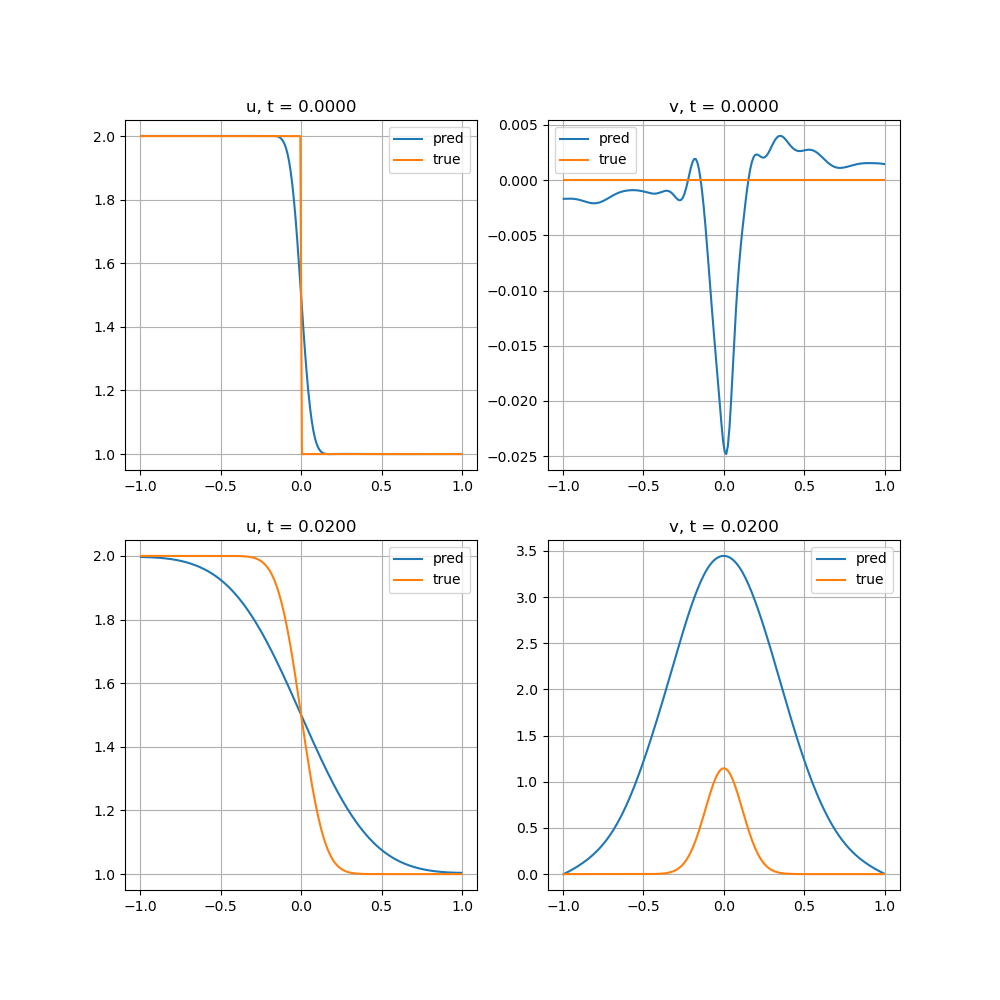

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(2, 2, figsize = (10, 10))


ax[0][0].plot(x_test, uv_pred[0][:, 0:1], label = "pred")
ax[0][0].plot(x_test, u_true[:, 0], label = "true")
ax[0][0].set_title("u, t = {:.4f}".format(t_test[0, 0]))

ax[0][1].plot(x_test, uv_pred[0][:, 1:2], label = "pred")
ax[0][1].plot(x_test, v_true[:, 0], label = "true")
ax[0][1].set_title("v, t = {:.4f}".format(t_test[0, 0]))

ax[1][0].plot(x_test, uv_pred[-1][:, 0:1], label = "pred")
ax[1][0].plot(x_test, u_true[:, -1], label = "true")
ax[1][0].set_title("u, t = {:.4f}".format(t_test[-1, 0]))

ax[1][1].plot(x_test, uv_pred[-1][:, 1:2], label = "pred")
ax[1][1].plot(x_test, v_true[:, -1], label = "true")
ax[1][1].set_title("v, t = {:.4f}".format(t_test[-1, 0]))

for i in range(2):
	for j in range(2):
		ax[i][j].legend()
		ax[i][j].grid()

plt.show()